<a href="https://colab.research.google.com/github/dvisionst/Analysis_of_Kmeans_Core/blob/main/Analysis_of_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of KMeans (Core)

- Jose Flores
- 15 August 2022

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can download the data here. The original data is from this data source.



Use KMeans to create various customer segments.
Use an Elbow Plot of inertia
And a plot of Silhouette Scores
Choose a K based on the results.
Submit your notebook below.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

In [2]:
# importing csv and creating a df
df = pd.read_csv('/content/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
# dropping the columns that are not neated for this clustering problem
df.drop(columns=['Unnamed: 0', 'Customer Id'], inplace=True)
df.head()


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [5]:
print(f"Duplicates: {df.duplicated().sum()}\n\n")

df.isna().sum()

Duplicates: 0




Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [6]:
# Instantiating a scaler
scaler = StandardScaler()
freq_imputer =  SimpleImputer(strategy='most_frequent')

num_pipe = make_pipeline(scaler, freq_imputer)
# Fitting and transforming the data
scaled_df = num_pipe.fit_transform(df)

In [7]:
# creating a elbow plot of inertias and looping through a range

inertias =[]

# looping from 2 to 10 range(2, 11)
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)


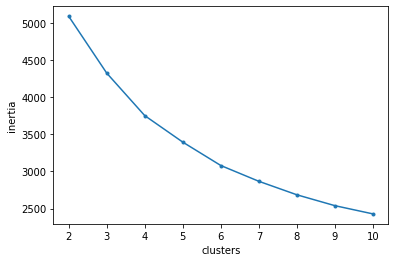

In [8]:
plt.plot(range(2,11), inertias, marker='.');
plt.xlabel('clusters');
plt.ylabel('inertia');

In [9]:
s_scores =[]

# looping from 2 to 10 range(2, 11)
for num in range(2, 11):
  kmeans = KMeans(n_clusters=num)
  kmeans.fit_transform(scaled_df)
  s_scores.append(silhouette_score(scaled_df, kmeans.labels_))


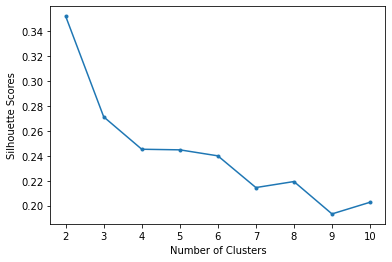

In [10]:
plt.plot(range(2,11), s_scores, marker='.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Scores');

In [14]:
# choosing my k to be 2 since the silhouette scored the highest and there is
# no clear elbow distinction in the elbow plot creating best kmeans

best_kmeans = KMeans(n_clusters=2, random_state=42)
best_kmeans.fit(scaled_df);

# Making a column out of the clusters

df['cluster'] = best_kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


In [16]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
clust_groups = df.groupby('cluster', as_index=False).mean()
clust_groups


,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,33.054896,1.646884,6.557864,33.942136,0.940387,1.91762,0.261649,9.118694
1,1,42.590909,1.954545,16.255682,95.437500,4.014068,7.52546,0.260563,14.203977


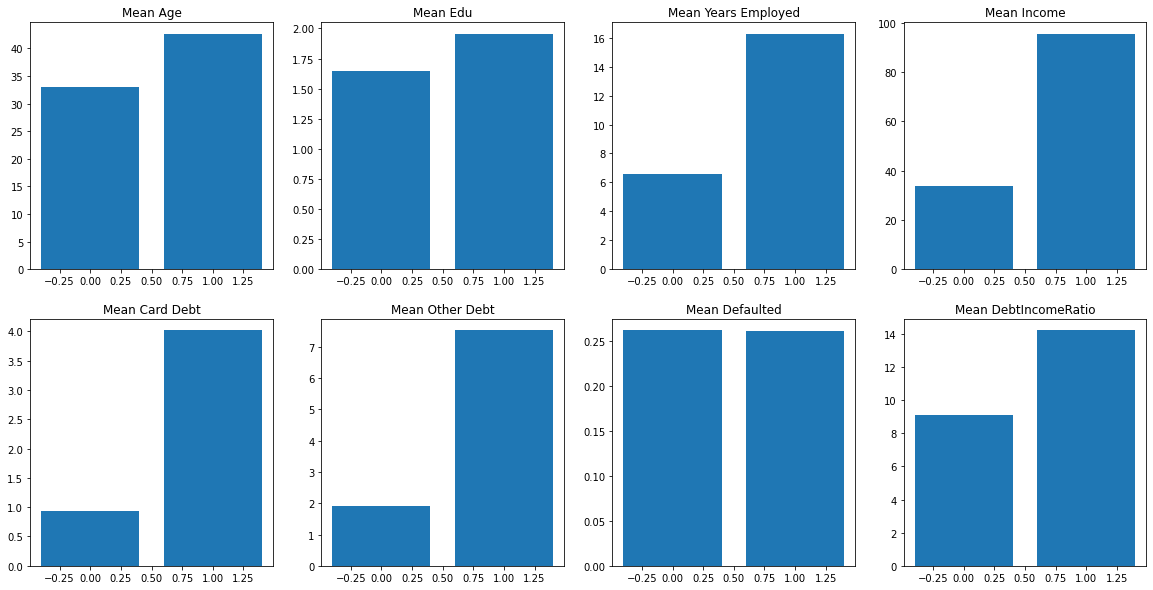

In [18]:
# creating plots to visualize the data
fig, axes = plt.subplots(2,4, figsize = (20, 10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(clust_groups.columns[1:]):
  axes[i].bar(clust_groups['cluster'], clust_groups[col])
  axes[i].set_title(f'Mean {col}')



## Cluster Analysis

The customers in cluster 0 are in general younger than those in cluster 1. They have less years of employment and subsequently less income. They have a lower education average but it’s not significantly lower than those in cluster 1. The education levels amongst the two clusters is close enough that it doesn’t explain the large gap in mean income between the two. The one area in which cluster zero bodes significantly better is that debt. Cluster 0 has much less credit card and other types of debt compared to the customers in cluster 1. Yet since their income is also low, cluster 0’s income to debt ratio isn’t significantly lower than cluster 1. One of the key features of this dataset is that of years employed. Cluster 1 customers have worked much longer than the customers in cluster 0. It seems that years employed could explain the income gap between the two clusters. Cluster 1 has worked more, thus it’s reasonable to say that they have had various promotions, moved into leadership positions, perfected job skills, all of which affect the amount they get compensated. The downside is that cluster 1 has accrued a lot more debt than their younger counterparts in cluster 0. 



# Recommendations

Based on these findings I would recommend a marketing strategy that can take advantage of the low amount of debt that cluster 0 has. New products could be targeted to the younger customers that incentivize promotional credit offers. Make the marketing strategy anchored around fun and outgoing themes. For cluster 1 they already have plenty of debt. For this customer base, I would recommend to stay away from marketing them credit offers. Instead as high income owners, cluster 1 could be marketed with high end products. Luxury items that can be seen as status symbols. Focus on the strategy on the quality and exclusivity of these high end products. 